In [1]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 884.5 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 433.5 kB/s eta 0:00:00 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.15-py3-none-any.whl size=99605 sha256=db2ce0baa72f4252dee8b7bc91f2815155bde235541cfeed9e78a3b572b43f17
  Stored in directory: /root/.cache/pip/wheels/46/0f/33/40c049c224ee941c2b3a7abb858fc34d93e827f9a833d40f09
Successfully built kaggle

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
from kaggle import KaggleApi
api = KaggleApi()

In [5]:
api.authenticate()

In [6]:
api.dataset_download_file('notshrirang/spotify-million-song-dataset','spotify_millsongdata.csv',path='data/')

True

In [9]:
from zipfile import ZipFile

In [13]:
with ZipFile('data/spotify_millsongdata.csv.zip',mode='r') as zip_file:
    zip_file.extractall('data/')

In [146]:
import pandas as pd

In [147]:
df = pd.read_csv('data/spotify_millsongdata.csv')

#### This is Spotify Million Song Dataset. This dataset contains song names, artists names, link to the song and lyrics. This dataset can be used for recommending songs, classifying or clustering songs.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [4]:
df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


The goal here is to perform monothetic clustering on the Text feature column to find hidden patterns between each song document and identify relationship between specific songs.

In [5]:
df.text.to_list()[7]

"Chiquitita, tell me what's wrong  \r\nYou're enchained by your own sorrow  \r\nIn your eyes there is no hope for tomorrow  \r\nHow I hate to see you like this  \r\nThere is no way you can deny it  \r\nI can see that you're oh so sad, so quiet  \r\n  \r\nChiquitita, tell me the truth  \r\nI'm a shoulder you can cry on  \r\nYour best friend, I'm the one you must rely on  \r\nYou were always sure of yourself  \r\nNow I see you've broken a feather  \r\nI hope we can patch it up together  \r\n  \r\nChiquitita, you and I know  \r\nHow the heartaches come and they go and the scars they're leaving  \r\nYou'll be dancing once again and the pain will end  \r\nYou will have no time for grieving  \r\nChiquitita, you and I cry  \r\nBut the sun is still in the sky and shining above you  \r\nLet me hear you sing once more like you did before  \r\nSing a new song, Chiquitita  \r\nTry once more like you did before  \r\nSing a new song, Chiquitita  \r\n  \r\nSo the walls came tumbling down  \r\nAnd you

### Text Pre-Processing

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


False

In [7]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [8]:
data = df.text.to_list()

In [9]:
cleaned_data = []
for sentence in data:
    cleaned_data.append(' '.join([word.lower() for word in sentence.split() if word.lower() not in stopwords]))

In [10]:
from nltk.stem import LancasterStemmer
stem = LancasterStemmer()

In [11]:
stemmed_data = []
for sentence in cleaned_data:
    stemmed_data.append(''.join([stem.stem(word=word) for word in sentence]))

In [12]:
stemmed_data[0]

"look face, wonderful face means something special look way smiles sees lucky one fellow be? kind girl, makes feel fine could ever believe could mine? kind girl, without i'm blue ever leaves could do, could do? go walk park holds squeezes hand we'll go walking hours talking things plan kind girl, makes feel fine could ever believe could mine? kind girl, without i'm blue ever leaves could do, could do?"

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from nltk.stem import WordNetLemmatizer

In [15]:
lemmatizer = WordNetLemmatizer()

In [16]:
lemma_data = []
for sentence in cleaned_data:
    lemma_data.append(' '.join([lemmatizer.lemmatize(word=word) for word in sentence.split()]))

In [17]:
lemma_data[0]

"look face, wonderful face mean something special look way smile see lucky one fellow be? kind girl, make feel fine could ever believe could mine? kind girl, without i'm blue ever leaf could do, could do? go walk park hold squeeze hand we'll go walking hour talking thing plan kind girl, make feel fine could ever believe could mine? kind girl, without i'm blue ever leaf could do, could do?"

###### We have to convert categorical data, such as text or words, into a numerical form before we can pass it on to a machine learning algorithm

Here, I will make use of the bag-of-words, which allows us the representation of text as numerical feature vectors.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [19]:
vectorizer = CountVectorizer()

In [20]:
import numpy as np
bag = vectorizer.fit_transform(np.array(stemmed_data))

In [21]:
count_array = list(bag)

In [22]:
count_array[40].shape

(1, 82382)

From The shape above, it can be inferred that the size of our vocabulary is 82382

In [23]:
count_array[0].toarray()[count_array[0].toarray() == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [24]:
count_array[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [25]:
from sklearn.decomposition import PCA,SparsePCA,TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [26]:
pca = SparsePCA(n_components=2,random_state=11,tol=1e-04)

In [27]:
scaler = StandardScaler(with_mean=True, with_std=True,)
# sd = pca.fit_transform(scaler.fit_transform(count_array[0].toarray()))

In [28]:
sample_len = 1001
sample = np.array([count_array[i].toarray() for i in range(sample_len)]).reshape((sample_len,-1))

In [29]:
sample

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
scaled_sample = scaler.fit_transform(sample)

In [31]:
pca_sample = pca.fit_transform(scaled_sample)

In [32]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


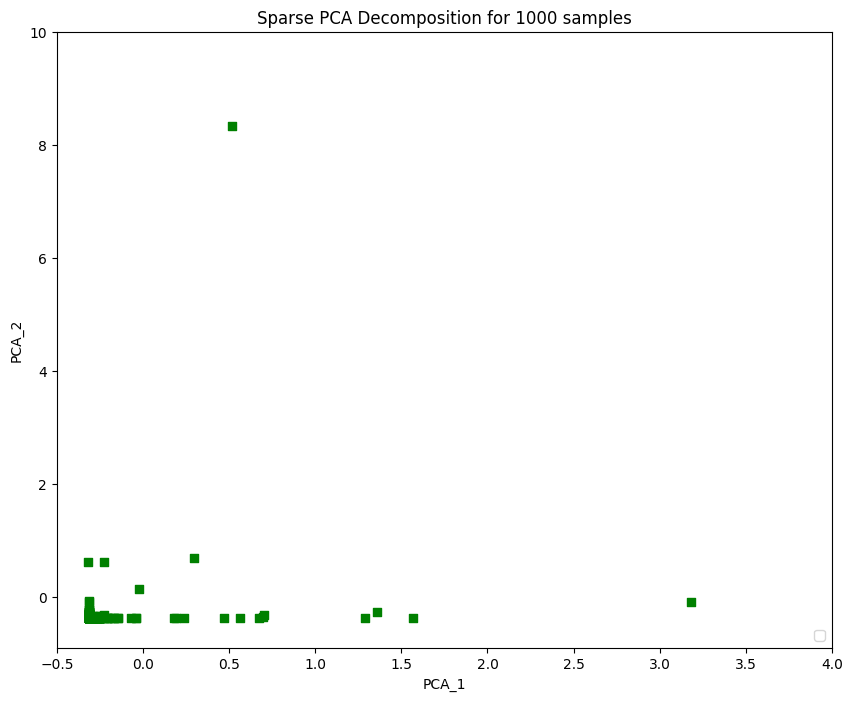

In [33]:
fig = plt.figure(figsize=(10,8))
plt.scatter(pca_sample[:,0],pca_sample[:,1],color='green',marker='s')
plt.xlim([-0.5,4])
plt.ylim([-0.9,10])
plt.title('Sparse PCA Decomposition for 1000 samples')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(loc='lower right')

In [34]:
pca_sample[:,0].argmax()

19

In [35]:
pca_sample[19]

array([291.07024303,  -0.31174847])

In [36]:
from nltk.corpus import stopwords
def preprocess_text(df,stem=True):
    data = df.text.to_list()
    stop_words = set(stopwords.words('english'))
    cleaned_data = []
    for sentence in data:
        cleaned_data.append(' '.join([word.lower() for word in sentence.split() if word.lower() not in stop_words]))
    if stem:
        stem = LancasterStemmer()
        processed_data = []
        for sentence in cleaned_data:
            processed_data.append(''.join([stem.stem(word=word) for word in sentence]))
    else:
        lemmatizer = WordNetLemmatizer()
        processed_data = []
        for sentence in cleaned_data:
            processed_data.append(' '.join([lemmatizer.lemmatize(word=word) for word in sentence.split()]))
    vectorizer = CountVectorizer()
    bag = vectorizer.fit_transform(np.array(processed_data))
    count_array = list(bag)
    pca = SparsePCA(n_components=2,random_state=11,tol=1e-04)
    scaler = StandardScaler(with_mean=True, with_std=True,)
    
    start = 1000
    sample = np.array([count_array[i].toarray() for i in range(start)]).reshape((start,-1))
    scaled_sample = scaler.fit_transform(sample)
    df = pca.fit_transform(scaled_sample)
    sample_len = 2000
    while sample_len < len(processed_data):
        print(f'Iterating through text {start} - {sample_len} of the data....')
        sample = np.array([count_array[i].toarray() for i in range(start,sample_len)]).reshape((1000,-1))
        scaled_sample = scaler.fit_transform(sample)
        pca_sample = pca.fit_transform(scaled_sample)
        df = np.vstack((df,pca_sample))
        start += 1000
        sample_len += 1000
        
    print(f'Iterating through the last text of the data....')
    sample_len = len(processed_data)
    shape = sample_len-start
    sample = np.array([count_array[i].toarray() for i in range(start,sample_len)]).reshape((shape,-1))
    scaled_sample = scaler.fit_transform(sample)
    pca_sample = pca.fit_transform(scaled_sample)
    df = np.vstack((df,pca_sample))
    
    return df

In [37]:
df = preprocess_text(df,stem=True)

Iterating through text 1000 - 2000 of the data....
Iterating through text 2000 - 3000 of the data....
Iterating through text 3000 - 4000 of the data....
Iterating through text 4000 - 5000 of the data....
Iterating through text 5000 - 6000 of the data....
Iterating through text 6000 - 7000 of the data....
Iterating through text 7000 - 8000 of the data....
Iterating through text 8000 - 9000 of the data....
Iterating through text 9000 - 10000 of the data....
Iterating through text 10000 - 11000 of the data....
Iterating through text 11000 - 12000 of the data....
Iterating through text 12000 - 13000 of the data....
Iterating through text 13000 - 14000 of the data....
Iterating through text 14000 - 15000 of the data....
Iterating through text 15000 - 16000 of the data....
Iterating through text 16000 - 17000 of the data....
Iterating through text 17000 - 18000 of the data....
Iterating through text 18000 - 19000 of the data....
Iterating through text 19000 - 20000 of the data....
Iterating 

In [38]:
df

array([[-0.31345851, -0.36547405],
       [-0.31345851, -0.36547405],
       [-0.31345851, -0.36547405],
       ...,
       [-0.69787914, -0.24319391],
       [-0.60876804, -0.56946623],
       [-0.69599737, -0.29238839]])

In [39]:
len(cleaned_data)

57650

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


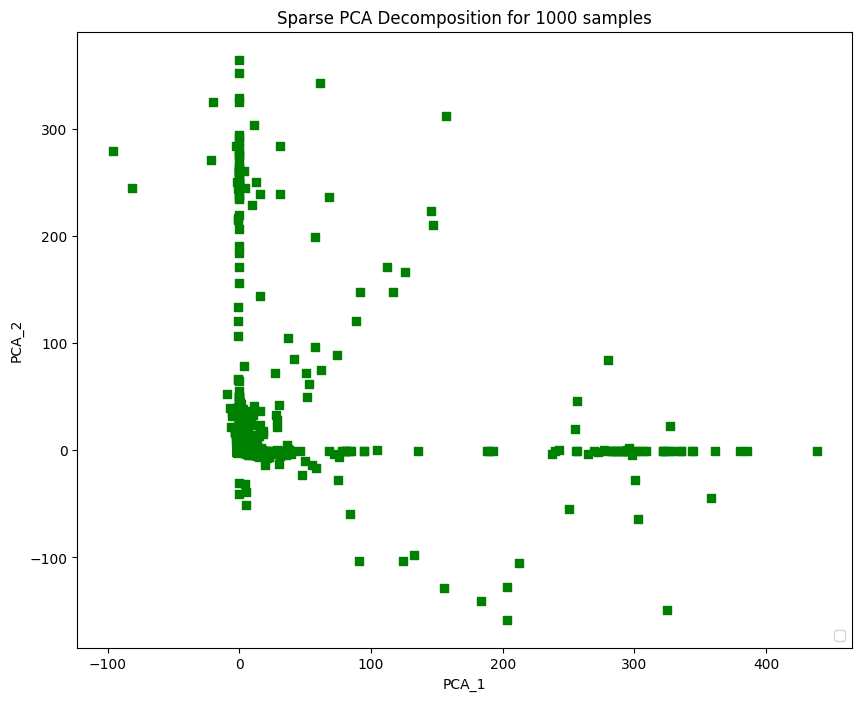

In [40]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df[:,0],df[:,1],color='green',marker='s')
# plt.xlim([-2,4])
# plt.ylim([-2,10])
plt.title('Sparse PCA Decomposition for 1000 samples')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(loc='lower right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


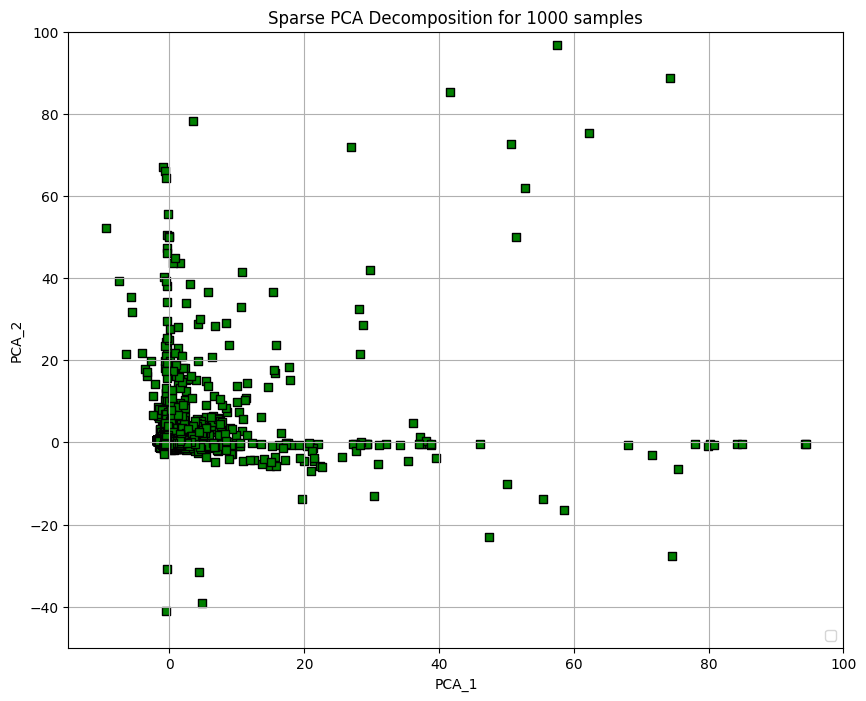

In [41]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df[:,0],df[:,1],color='green',marker='s',edgecolor='black')
plt.xlim([-15,100])
plt.ylim([-50,100])
plt.title('Sparse PCA Decomposition for 1000 samples')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.grid()
plt.legend(loc='lower right')

In [42]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.spatial.distance import pdist

## Applying KMeans Algorithm on data

In [43]:
km = KMeans(n_clusters=10,init='random',n_init=100,max_iter=300,tol=0.0001)

In [44]:
y_km = km.fit_predict(df)

In [45]:
np.unique(y_km)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [46]:
km.cluster_centers_

array([[170.40585582, -87.81166136],
       [ 25.48771482,  -2.0398214 ],
       [ -1.21468632, 263.66448965],
       [301.67648465,  -3.85335774],
       [  0.84974928,   1.81411863],
       [ 31.69572199, 105.57233913],
       [ 82.62097533,  -7.78789085],
       [ -0.41533172,  -0.3717263 ],
       [  3.39083883,  30.37738742],
       [113.55634176, 201.61746191]])

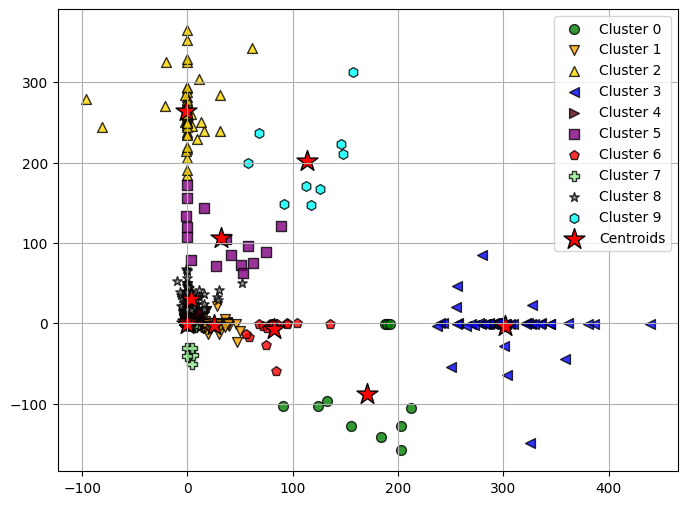

In [47]:
fig = plt.figure(figsize=(8,6),edgecolor='black')
colours =["green", "orange","gold", "blue","#550011", "purple","red",'lightgreen', 'gray', 'cyan']
mStyles = ["o","v","^","<",">","s","p","P","*","h","H","+","x","X","D","d","|","_"]
for idx,cl in enumerate(np.unique(y_km)):
    plt.scatter(x=df[y_km == cl, 0], y=df[y_km == cl, 1],s=50,c=colours[idx],
                marker=mStyles[idx],label=f'Cluster {cl}',edgecolors='black',alpha=0.8)

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',
           edgecolors='black',label='Centroids',c='red')
plt.grid()
plt.legend(scatterpoints=1)
plt.show()

#### I have specified 10 number of clusters here, this is a potential drawback of KMeans Algorithm(as you have to specify the number of k, a priori) which is not very evident in this situation

#### The variant of KMeans employed here is the classic KMeans Algorithm

### A smarter way of placing the initial cluster centroids using k-means++

In [48]:
#Exploring this approach to see if there are any improvements
km_plus = KMeans(n_clusters=10,init='k-means++',n_init=100,max_iter=300,tol=0.0001) ## This is achieved by changing the init parameter to k-means++

In [49]:
y_km = km_plus.fit_predict(df)

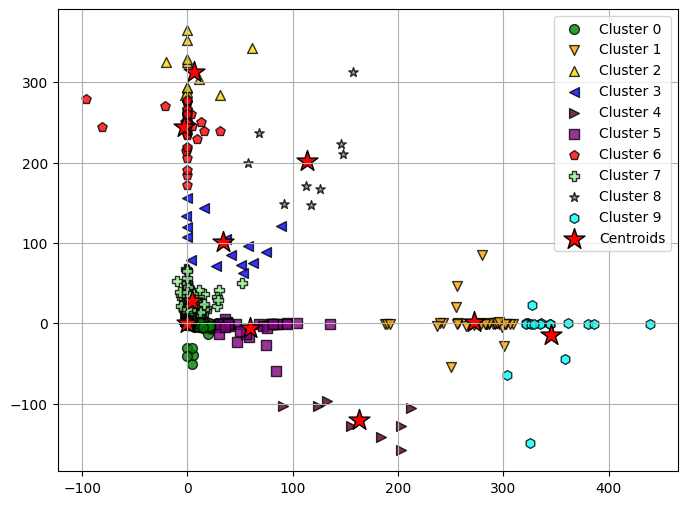

In [50]:
fig = plt.figure(figsize=(8,6),edgecolor='black')
colours =["green", "orange","gold", "blue","#550011", "purple","red",'lightgreen', 'gray', 'cyan']
mStyles = ["o","v","^","<",">","s","p","P","*","h","H","+","x","X","D","d","|","_"]
for idx,cl in enumerate(np.unique(y_km)):
    plt.scatter(x=df[y_km == cl, 0], y=df[y_km == cl, 1],s=50,c=colours[idx],
                marker=mStyles[idx],label=f'Cluster {cl}',edgecolors='black',alpha=0.8)

plt.scatter(km_plus.cluster_centers_[:,0],km_plus.cluster_centers_[:,1],s=250,marker='*',
           edgecolors='black',label='Centroids',c='red')
plt.grid()
plt.legend(scatterpoints=1)
plt.show()

#### Please Note that the model evaluation so far has been on the Stemmed Text Data and The bag of words(Term Frequency) model, in future explorations, I will make use of  TF-IDF(Term Frequency and Inverse Document Frequency approach) and the BERT Model for feature extraction

### Using the elbow method to find the optimal number of clusters

In [51]:
# we can use the elbow method, to estimate the optimal number of clusters
# By identifying the value of k where the distortion begins to increase most rapidly

km_distortion = []
km_plus_distortion = []
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=50,init='random',
                max_iter=300,tol=0.0001)
    km_plus = KMeans(n_clusters=i,n_init=50,init='k-means++',
                max_iter=300,tol=0.0001)
    km.fit(df)
    km_plus.fit(df)
    km_distortion.append(km.inertia_)
    km_plus_distortion.append(km_plus.inertia_)

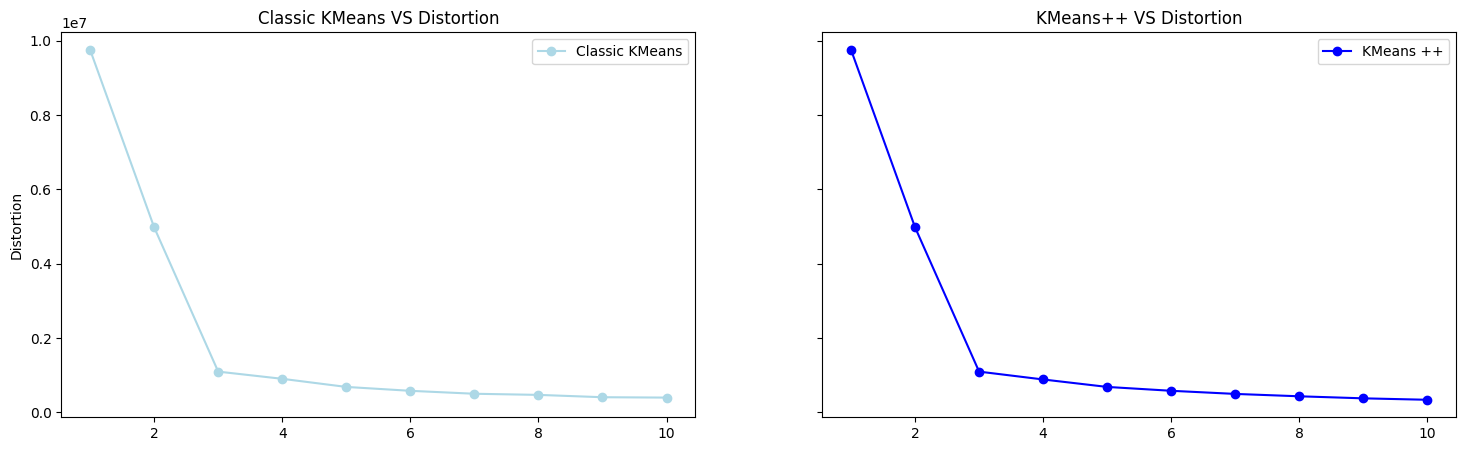

In [52]:
fig,ax = plt.subplots(1,2,figsize=(18,5),sharey=True)
ax[0].plot(list(range(1,11)),km_distortion,color='lightblue',marker='o',label='Classic KMeans')
ax[1].plot(list(range(1,11)),km_plus_distortion,color='blue',marker='o',label='KMeans ++')
ax[0].set_title('Classic KMeans VS Distortion')
ax[1].set_title('KMeans++ VS Distortion')
ax[0].set_ylabel('Distortion')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.show()

### As we can see in the following plot, the elbow is located at k=3, which is evidence that k=3 is indeed a good choice for this dataset

## Quantifying the quality of clustering via silhouette plots

## Silhouette analysis for classic KMeans algorithm

In [53]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples,silhouette_score

In [54]:
km = KMeans(n_clusters=3,init='random',n_init=100,max_iter=300,tol=0.0001,random_state=11)
y_km = km.fit_predict(df)

In [55]:
silhouette_samples(X=df,labels=y_km,metric='euclidean')

array([0.99781963, 0.99781963, 0.99781963, ..., 0.99734314, 0.99749907,
       0.99739951])

#### Silhouette analysis can be used as a graphical tool to plot a measure of how tightly grouped the samples in the clusters are. it is bounded in the range -1 to 1
- The silhouette coefficient is 0 if the cluster separation and cohesion are equal 
- We get close to an ideal silhouette coefficient of 1 if the cluster separation(b) >> cluster cohesion(a), since cluster separation(b) quantifies how dissimilar a sample is to other clusters, and cluster cohesion(a) tells us how similar it is to the other samples in its own cluster.

In [56]:
cluster_label = np.unique(y_km)
n_clusters = cluster_label.shape[0]
silhouette_values = silhouette_samples(X=df,labels=y_km,metric='euclidean')

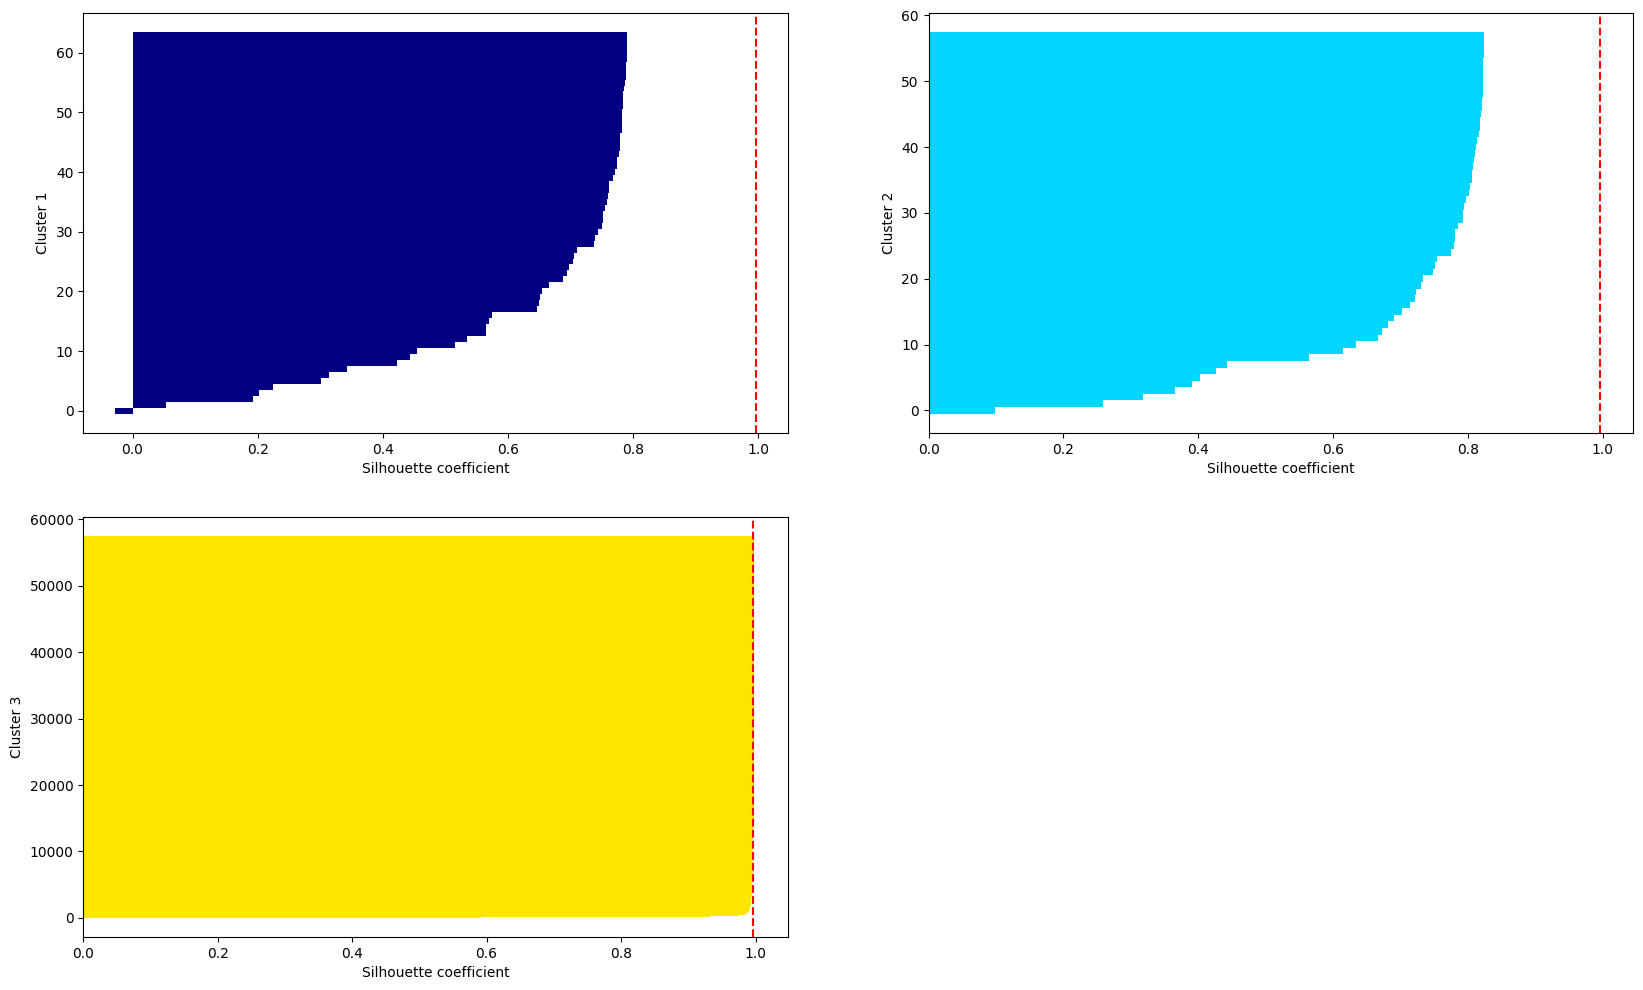

In [57]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(20,12))
ax[-1,-1].remove()
axes = ax.ravel()
for i, c in enumerate(cluster_label):
    y_ax_lower, y_ax_upper = 0, 0
    c_silhouette_vals = silhouette_values[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    axes[i].barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,
            edgecolor='none',color=color,height=1.0)
    silhouette_avg = np.mean(silhouette_values)
    axes[i].axvline(silhouette_avg,color='red',linestyle='--')
    axes[i].set_ylabel(f'Cluster {c+1}')
    axes[i].set_xlabel('Silhouette coefficient')
    
plt.show()

#### We can see in the preceding silhouette plot, the silhouette coefficient for all 3 clusters are not even close to 0, which is in this case an indicator of a good clustering. Furthermore, to summarize the goodness of our clustering, I added the average silhouette coefficient to the plot (red dotted line).

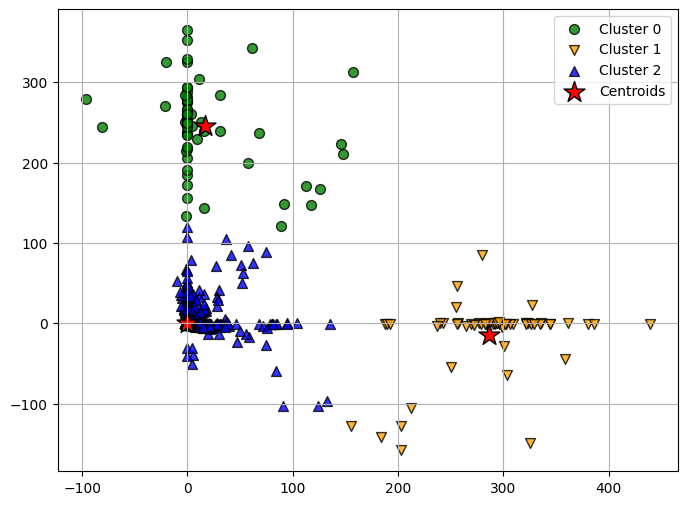

In [58]:
fig = plt.figure(figsize=(8,6),edgecolor='black')
colours =["green", "orange", "blue","#550011", "purple","red",'lightgreen', 'gray', 'cyan']
mStyles = ["o","v","^","<",">","s","p","P","*","h","H","+","x","X","D","d","|","_"]
for idx,cl in enumerate(np.unique(y_km)):
    plt.scatter(x=df[y_km == cl, 0], y=df[y_km == cl, 1],s=50,c=colours[idx],
                marker=mStyles[idx],label=f'Cluster {cl}',edgecolors='black',alpha=0.8)

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',
           edgecolors='black',label='Centroids',c='red')
plt.grid()
plt.legend(scatterpoints=1)
plt.show()

## Silhouette analysis for KMeans++ algorithm

In [59]:
km_plus = KMeans(n_clusters=3,init='k-means++',n_init=100,max_iter=300,tol=0.0001,random_state=11)
y_km = km_plus.fit_predict(df)

In [60]:
cluster_label = np.unique(y_km)
n_clusters = cluster_label.shape[0]
silhouette_values = silhouette_samples(X=df,labels=y_km,metric='euclidean')

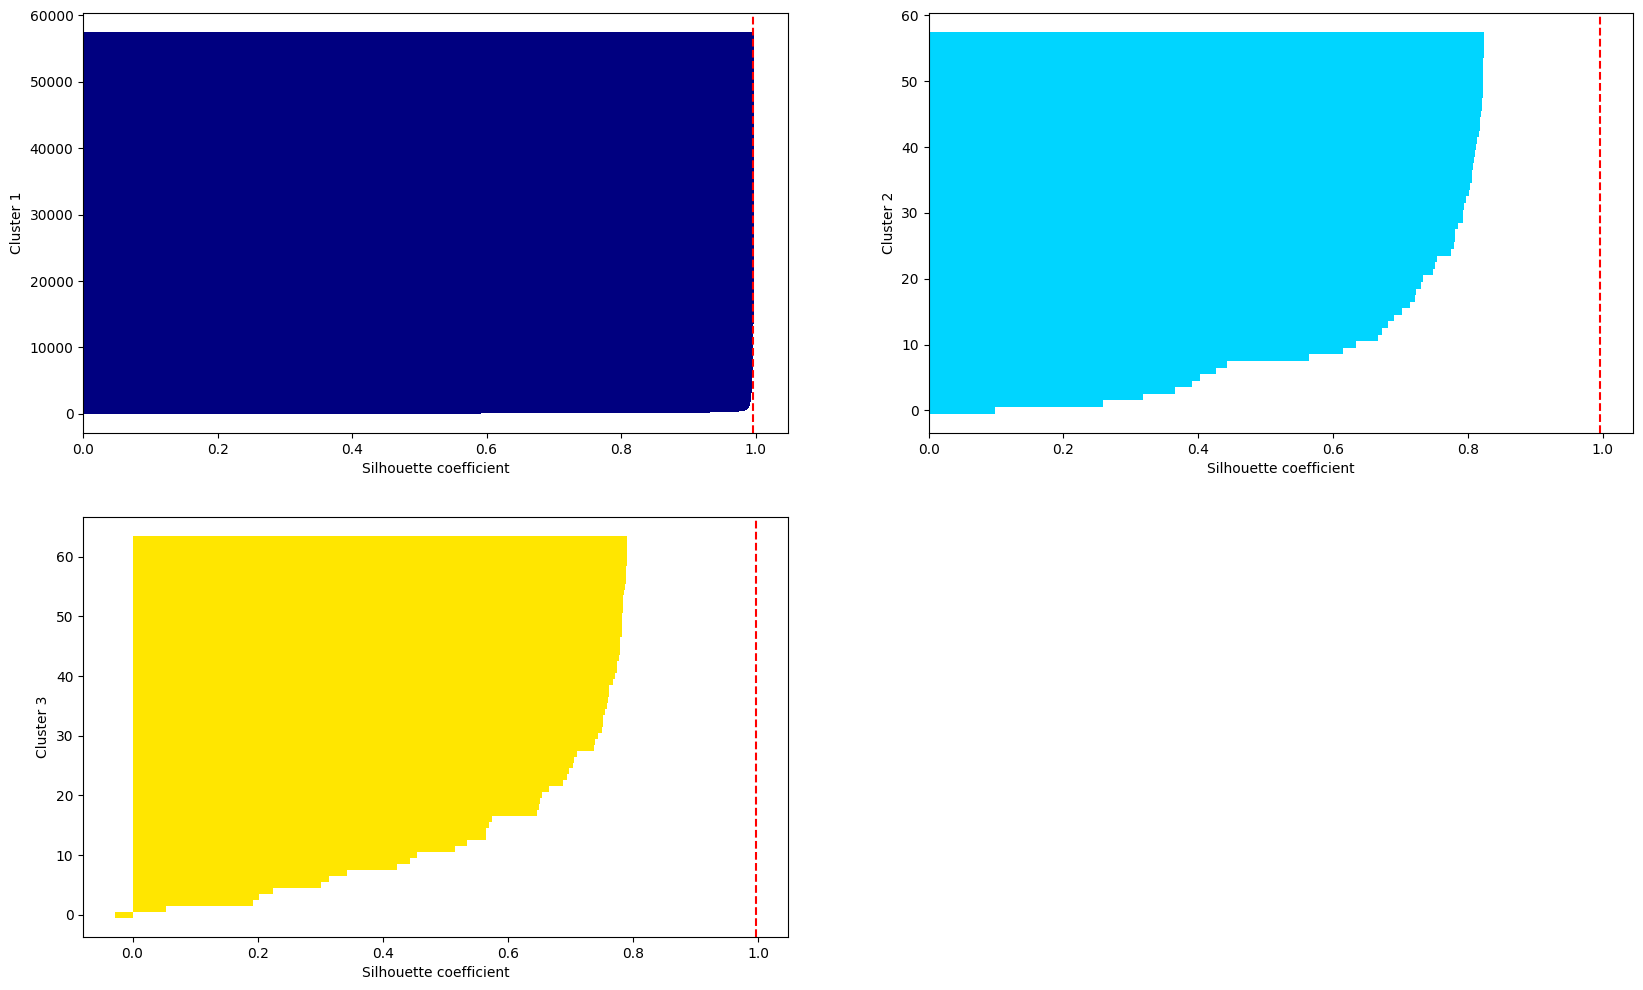

In [61]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(20,12))
ax[-1,-1].remove()
axes = ax.ravel()
for i, c in enumerate(cluster_label):
    y_ax_lower, y_ax_upper = 0, 0
    c_silhouette_vals = silhouette_values[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    axes[i].barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,
            edgecolor='none',color=color,height=1.0)
    silhouette_avg = np.mean(silhouette_values)
    axes[i].axvline(silhouette_avg,color='red',linestyle='--')
    axes[i].set_ylabel(f'Cluster {c+1}')
    axes[i].set_xlabel('Silhouette coefficient')
    
plt.show()

#### Almost similar performance with the classic KMeans algorithm

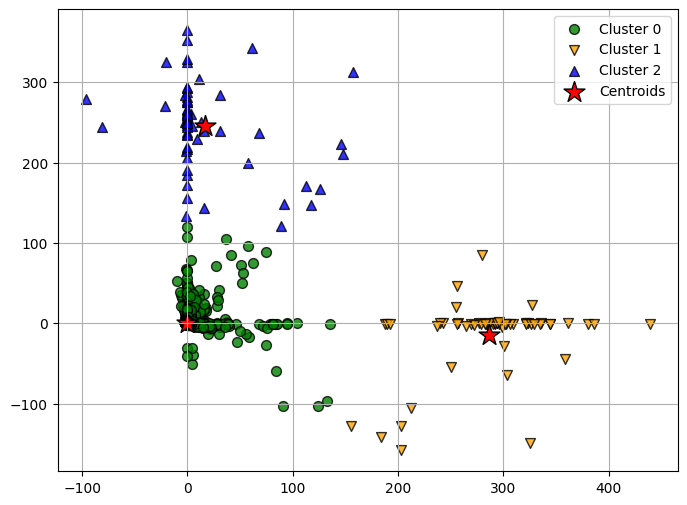

In [62]:
fig = plt.figure(figsize=(8,6),edgecolor='black')
colours =["green", "orange", "blue","#550011", "purple","red",'lightgreen', 'gray', 'cyan']
mStyles = ["o","v","^","<",">","s","p","P","*","h","H","+","x","X","D","d","|","_"]
for idx,cl in enumerate(np.unique(y_km)):
    plt.scatter(x=df[y_km == cl, 0], y=df[y_km == cl, 1],s=50,c=colours[idx],
                marker=mStyles[idx],label=f'Cluster {cl}',edgecolors='black',alpha=0.8)

plt.scatter(km_plus.cluster_centers_[:,0],km_plus.cluster_centers_[:,1],s=250,marker='*',
           edgecolors='black',label='Centroids',c='red')
plt.grid()
plt.legend(scatterpoints=1)
plt.show()

In [63]:
cluster_zero_songs = np.array(cleaned_data)[y_km == 0]

In [64]:
df_songs = pd.read_csv('data/spotify_millsongdata.csv')

In [65]:
df_songs.iloc[y_km == 0]

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


In [66]:
df_songs.iloc[y_km == 1]

,artist,song,link,text
19,ABBA,Fernando (In Spanish),/a/abba/fernando+in+spanish_20930420.html,Puedes escuchar Fernando? \r\nMe recuerda tie...
1425,Billy Joel,We Didn't Start The Fire,/b/billy+joel/we+didnt+start+the+fire_10034849...,"Harry Truman, Doris Day, Red China, Johnnie Ra..."
2339,Celine Dion,Le Ballet,/c/celine+dion/le+ballet_20028731.html,(Jean-Jacques Goldman) \r\n \r\n? A t'arrive...
3217,Cliff Richard,"Gut, Dass Es Freunde Gibt",/c/cliff+richard/gut+dass+es+freunde+gibt_2003...,(Power to all our friends) \r\n \r\n \r\nRe...
4537,Drake,Stunt Hard,/d/drake/stunt+hard_20607367.html,"[Chorus] \r\nI did it all on my own, \r\nTur..."
5698,Exo-K,Overdose,/e/exo+k/overdose_21082897.html,Come in \r\n \r\n[Baekhyun] Modeungeol geolg...
6977,Gloria Estefan,Amour Infini,/g/gloria+estefan/amour+infini_20060747.html,(Heaven's What I Feel - French Version) \r\n ...
7687,Helloween,Laudate Dominum,/h/helloween/laudate+dominum_20233579.html,"Halleluja, homines, \r\nGaudete de domino, \..."
8526,Inna,Fata Din Randul Trei,/i/inna/fata+din+randul+trei_21089297.html,Am vazut-o in multime \r\nTraia cantecul la f...
9811,Josh Groban,Un Amore Per Sempre,/j/josh+groban/un+amore+per+sempre_10153954.html,"Ecco ora mai, il momento temuto da tempo, sai ..."


In [67]:
df_songs.iloc[y_km == 2]

,artist,song,link,text
358,Aiza Seguerra,Sa Huli Ang Sikat,/a/aiza+seguerra/sa+huli+ang+sikat_21112050.html,Magmula giliw nang ika'y pumanaw \r\nKatawan ...
1596,Bob Dylan,Chimes Of Freedom,/b/bob+dylan/chimes+of+freedom_20021149.html,Far between sundown's finish an' midnight's br...
2336,Celine Dion,La Do Do La Do,/c/celine+dion/la+do+do+la+do_20028507.html,La do do la do \r\nDeux doigts sur un piano ...
3172,Clash,The Magnificent Seven,/c/clash/the+magnificent+seven_20031948.html,Ring! Ring! It's 7:00 A.M.! \r\nMove why'self...
4184,Dewa 19,Kirana,/d/dewa+19/kirana_20230291.html,Kucoba memahami tempatku berlabuh \r\nTerdamp...
...,...,...,...,...
53116,Tiffany,Once In A Lifetime,/t/tiffany/once+in+a+lifetime_21108741.html,[Tiffany] Amu geotdo mitgo sipji anhatji (Oh O...
54219,UB40,V's Version,/u/ub40/vs+version_20141654.html,Dais a de start and not the finish na go deal ...
55938,Weird Al Yankovic,Pretty Fly For A Rabbi,/w/weird+al+yankovic/pretty+fly+for+a+rabbi_20...,"(How ya doin', Bernie?) Oy vey, oy vey! \r\n(..."
56775,Wu-Tang Clan,Rushing Elephants,/w/wu+tang+clan/rushing+elephants_20662062.html,"[Intro: Raekwon] \r\nYo, yo, yo, what up kid?..."


In [68]:
path = 'data/count_vectorizer.npy'
np.save(path,df)

In [69]:
np.load(path)

array([[-0.31345851, -0.36547405],
       [-0.31345851, -0.36547405],
       [-0.31345851, -0.36547405],
       ...,
       [-0.69787914, -0.24319391],
       [-0.60876804, -0.56946623],
       [-0.69599737, -0.29238839]])

#### Employing Term Frequency-Inverse Document Frequency (tf-idf)  to downweight frequently occurring words in the feature vectors

The tf-idf is the product of the term frequency and the inverse document frequency. The scikit-learn library implements the TfidfTransformerclass, that takes the raw term frequencies from the CountVectorizer class as input and transforms them into tf-idfs

In [70]:
from sklearn.feature_extraction.text import TfidfTransformer

#### I will go ahead to modify our preprocess_text function to include tf-idf transformer class during our preprocessing step

In [71]:
from nltk.corpus import stopwords
def preprocess_text(data,stem=True):
    stop_words = set(stopwords.words('english'))
    cleaned_data = []
    for sentence in data:
        cleaned_data.append(' '.join([word.lower() for word in sentence.split() if word.lower() not in stop_words]))
    if stem:
        stem = LancasterStemmer()
        processed_data = []
        for sentence in cleaned_data:
            processed_data.append(''.join([stem.stem(word=word) for word in sentence]))
    else:
        lemmatizer = WordNetLemmatizer()
        processed_data = []
        for sentence in cleaned_data:
            processed_data.append(' '.join([lemmatizer.lemmatize(word=word) for word in sentence.split()]))
    vectorizer = CountVectorizer()
    tfidf = TfidfTransformer(norm='l2',use_idf=True,smooth_idf=True,)
    bag = tfidf.fit_transform(vectorizer.fit_transform(np.array(processed_data)))
    count_array = list(bag)
    pca = SparsePCA(n_components=2,random_state=11,tol=1e-04)
    scaler = StandardScaler(with_mean=True, with_std=True,)
    
    start = 1000
    sample = np.array([count_array[i].toarray() for i in range(start)]).reshape((start,-1))
    scaled_sample = scaler.fit_transform(sample)
    df = pca.fit_transform(scaled_sample)
    sample_len = 2000
    while sample_len < len(processed_data):
        print(f'Iterating through text {start} - {sample_len} of the data....')
        sample = np.array([count_array[i].toarray() for i in range(start,sample_len)]).reshape((1000,-1))
        scaled_sample = scaler.fit_transform(sample)
        pca_sample = pca.fit_transform(scaled_sample)
        df = np.vstack((df,pca_sample))
        start += 1000
        sample_len += 1000
        
    print(f'Iterating through the last text of the data....')
    sample_len = len(processed_data)
    shape = sample_len-start
    sample = np.array([count_array[i].toarray() for i in range(start,sample_len)]).reshape((shape,-1))
    scaled_sample = scaler.fit_transform(sample)
    pca_sample = pca.fit_transform(scaled_sample)
    df = np.vstack((df,pca_sample))
    
    return df

In [72]:
tf_idf_df = preprocess_text(data,stem=True)

Iterating through text 1000 - 2000 of the data....
Iterating through text 2000 - 3000 of the data....
Iterating through text 3000 - 4000 of the data....
Iterating through text 4000 - 5000 of the data....
Iterating through text 5000 - 6000 of the data....
Iterating through text 6000 - 7000 of the data....
Iterating through text 7000 - 8000 of the data....
Iterating through text 8000 - 9000 of the data....
Iterating through text 9000 - 10000 of the data....
Iterating through text 10000 - 11000 of the data....
Iterating through text 11000 - 12000 of the data....
Iterating through text 12000 - 13000 of the data....
Iterating through text 13000 - 14000 of the data....
Iterating through text 14000 - 15000 of the data....
Iterating through text 15000 - 16000 of the data....
Iterating through text 16000 - 17000 of the data....
Iterating through text 17000 - 18000 of the data....
Iterating through text 18000 - 19000 of the data....
Iterating through text 19000 - 20000 of the data....
Iterating 

In [73]:
tf_idf_df

array([[-0.30559128, -0.36052069],
       [-0.30559128, -0.36052069],
       [-0.30559128, -0.36052069],
       ...,
       [-0.32091987, -0.4619153 ],
       [-0.62807222, -0.46191362],
       [-0.4623207 , -0.46191452]])

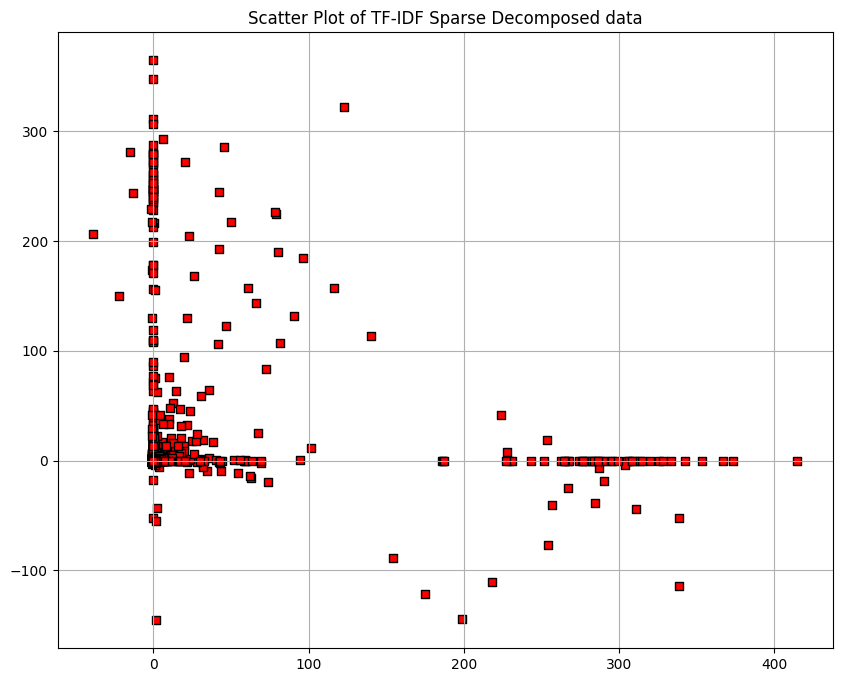

In [83]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tf_idf_df[:,0], tf_idf_df[:,1], color='red',marker='s',edgecolor='black')
plt.title('Scatter Plot of TF-IDF Sparse Decomposed data')
plt.grid()
plt.show()

#### Employing the elbow method to find the optimal number of clusters for the new separation

In [84]:
km_distortion = []
km_plus_distortion = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='random',n_init=15,max_iter=300,tol=0.0001)
    km_plus = KMeans(n_clusters=i,init='k-means++',n_init=15,max_iter=300,tol=0.0001)
    km.fit(tf_idf_df)
    km_plus.fit(tf_idf_df)
    km_distortion.append(km.inertia_)
    km_plus_distortion.append(km_plus.inertia_)

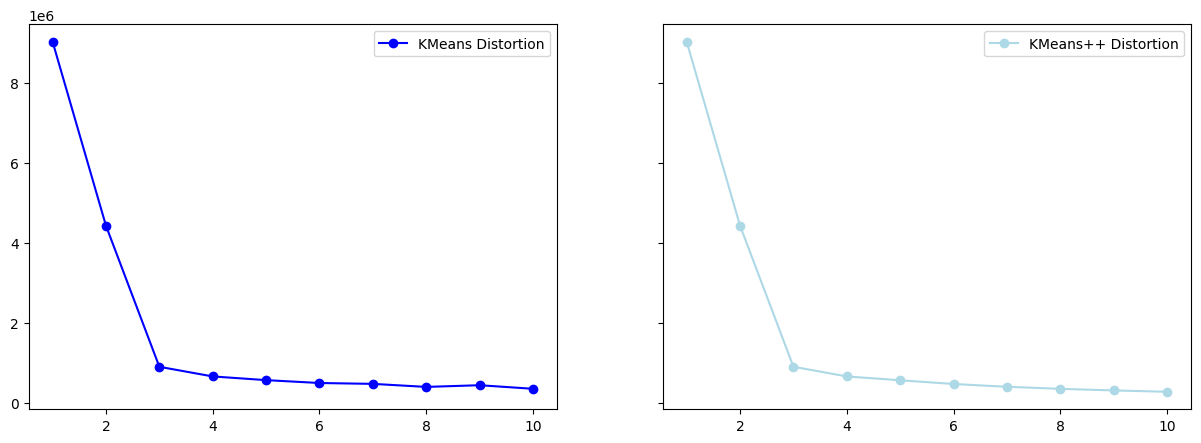

In [98]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5),sharey=True)
ax[0].plot(range(1,11),km_distortion,marker='o',color='blue',label='KMeans Distortion')
ax[1].plot(range(1,11),km_plus_distortion,marker='o',color='lightblue',label='KMeans++ Distortion')
ax[0].legend()
ax[1].legend()
plt.show()

### Best Value Falls at 3 cluster

In [125]:
km_plus = KMeans(n_clusters=3,init='k-means++',n_init=100,max_iter=300,random_state=42,tol=0.0001)
y_km = km.fit_predict(tf_idf_df)

In [126]:
plt.rcParams['figure.figsize'] = (10,6)

In [127]:
n_clusters = len(np.unique(y_km))

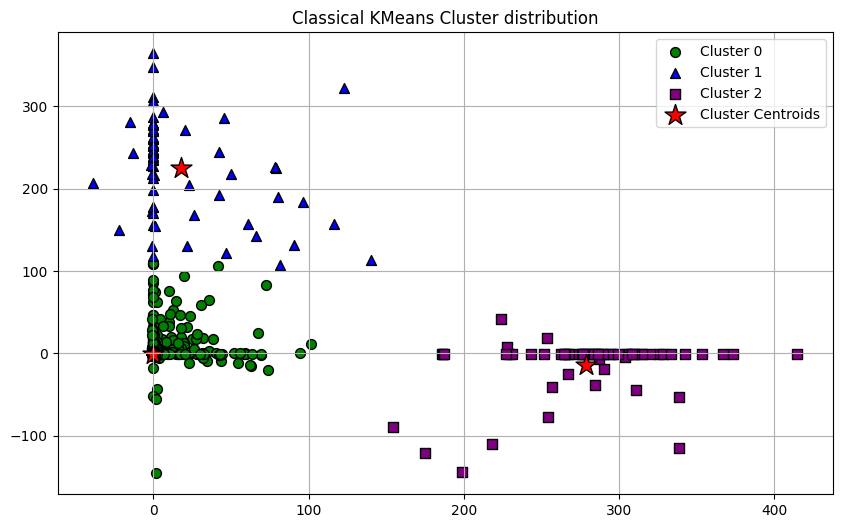

In [128]:
colours =["green", "blue", "purple","red",'lightgreen', 'gray', 'cyan']
mStyles = ["o","^","s","p","P","*","h","H","+","x","X","D","d","|","_"]
for idx,c in enumerate(np.unique(y_km)):
    plt.scatter(tf_idf_df[y_km==c,0],tf_idf_df[y_km==c,1],s=50,c=colours[idx],marker=mStyles[idx],edgecolors='black',
               label='Cluster %d' %c)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='red',edgecolors='black',
            marker='*',label='Cluster Centroids')

plt.grid()
plt.legend(loc='best')
plt.title('Classical KMeans Cluster distribution')
plt.show()

#### Looking at the plot above, we can see the TF-IDF perfectly separate the data compared to working with only the the count vectorizer. We will now quantify the quality of the clustering algorithm via silhouette plots

In [129]:
from sklearn.metrics import silhouette_samples
import matplotlib as cm

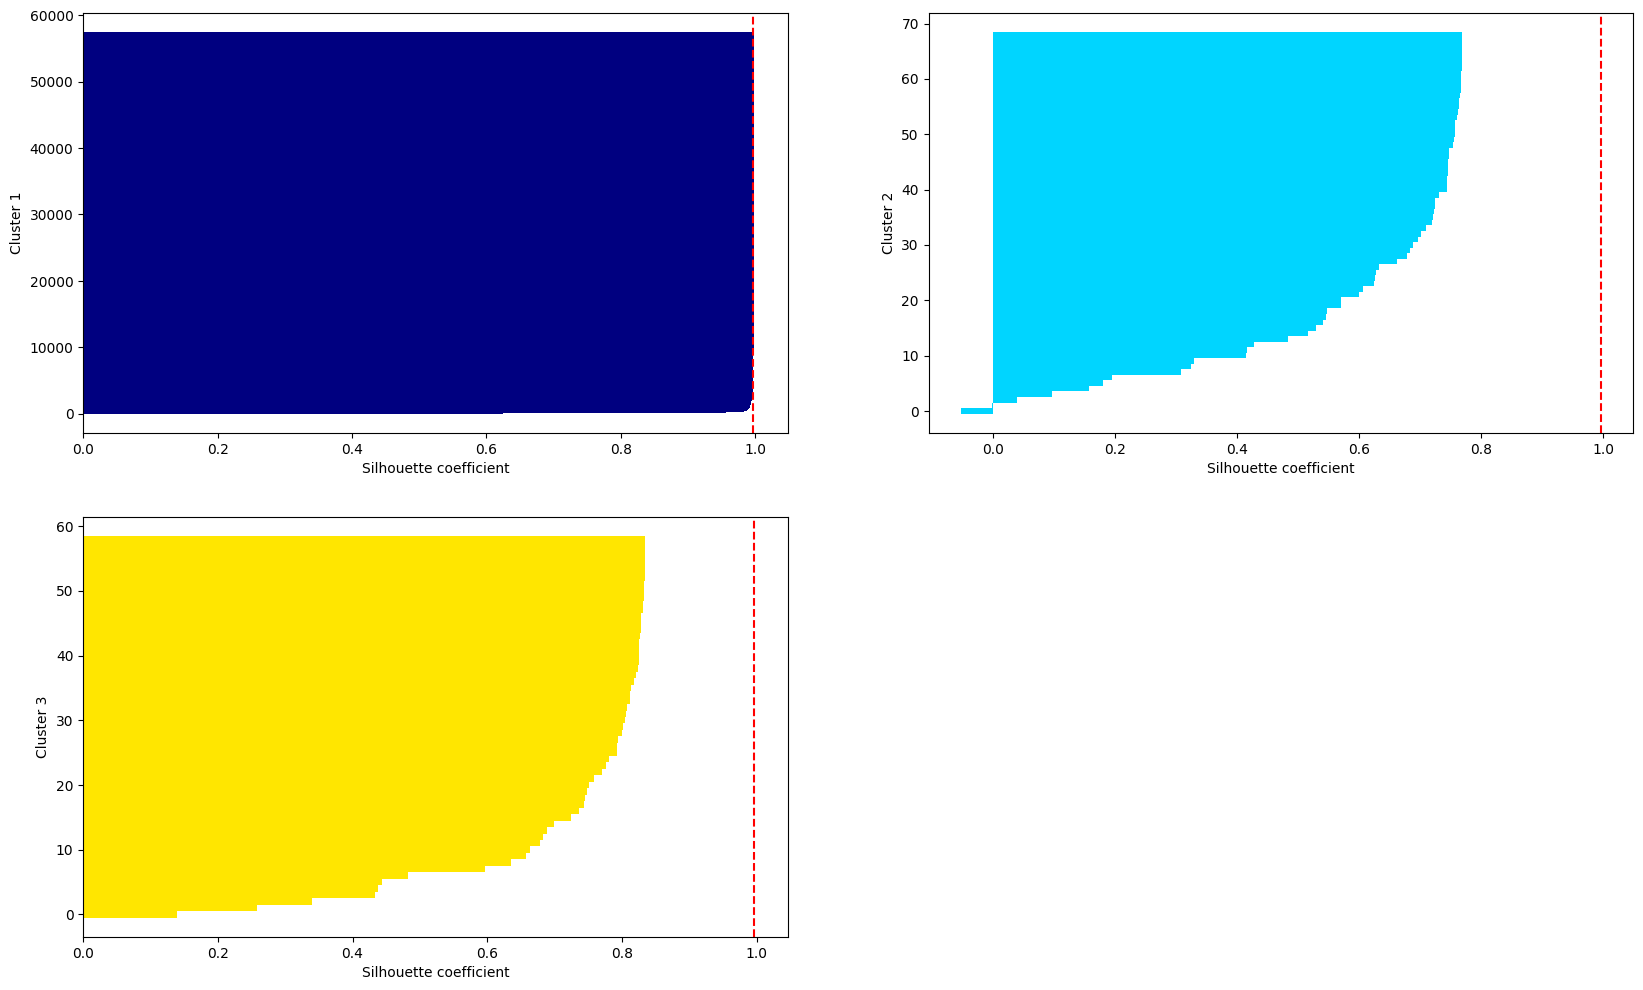

In [130]:
n_clusters = len(np.unique(y_km))
silhouette_values = silhouette_samples(tf_idf_df,y_km,metric='euclidean')
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(20,12))
ax[-1,-1].remove()
axes = ax.ravel()
for i, c in enumerate(np.unique(y_km)):
    y_ax_lower, y_ax_upper = 0, 0
    c_silhouette_vals = silhouette_values[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    axes[i].barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,
            edgecolor='none',color=color,height=1.0)
    silhouette_avg = np.mean(silhouette_values)
    axes[i].axvline(silhouette_avg,color='red',linestyle='--')
    axes[i].set_ylabel(f'Cluster {c+1}')
    axes[i].set_xlabel('Silhouette coefficient')
    
plt.show()

### We can see a slight improvement here for the 3 clusters following the Term Frequency - Inverse Document Frequency approach above that using only the CountVectorizer

#### We can query the songs based on the labels of each cluster for further exploration

In [134]:
df_songs.iloc[y_km == 0]

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


#### Let's Analyse the word cloud of the songs belonging to cluster 0

In [138]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 71.1 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [153]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [148]:
cluster_one = ' '.join(np.array(cleaned_data)[y_km == 0].tolist())
cluster_two = ' '.join(np.array(cleaned_data)[y_km == 1].tolist())
cluster_three = ' '.join(np.array(cleaned_data)[y_km == 2].tolist())

In [154]:
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(cluster_one)
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(cluster_two)
wordcloud3 = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(cluster_three)

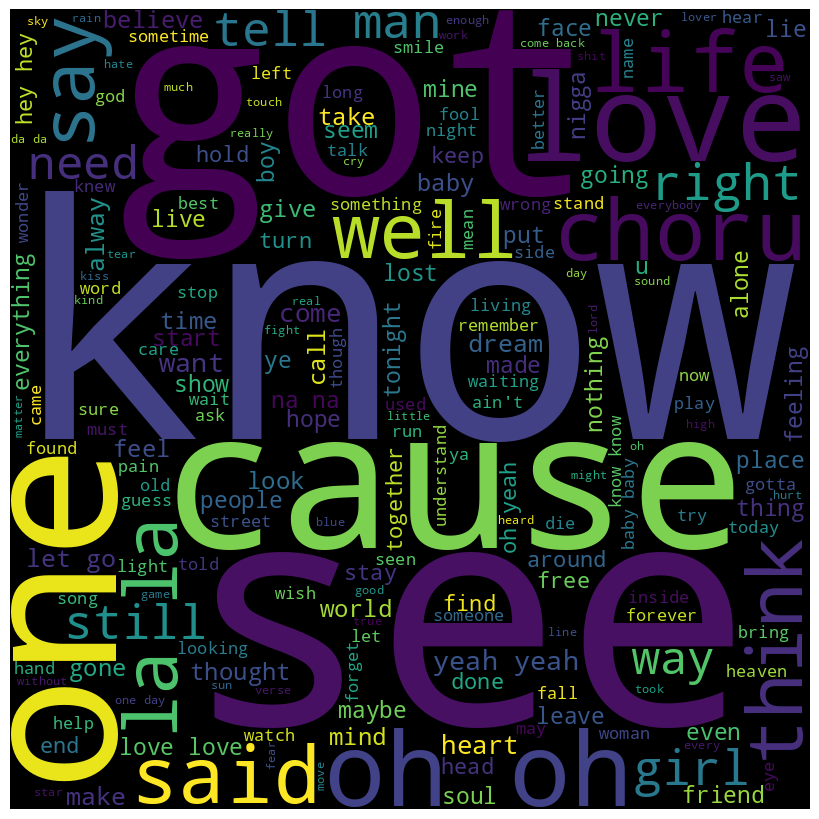

In [155]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### From the wordcloud for cluster 0(first cluster) we can get a hint from the prominent words in this cluster that the songs belonging to this group are likely going to be love songs; the words love,heart,forget,soul,fall,think are words that are usually indicative of love songs and they appear prominently in this group

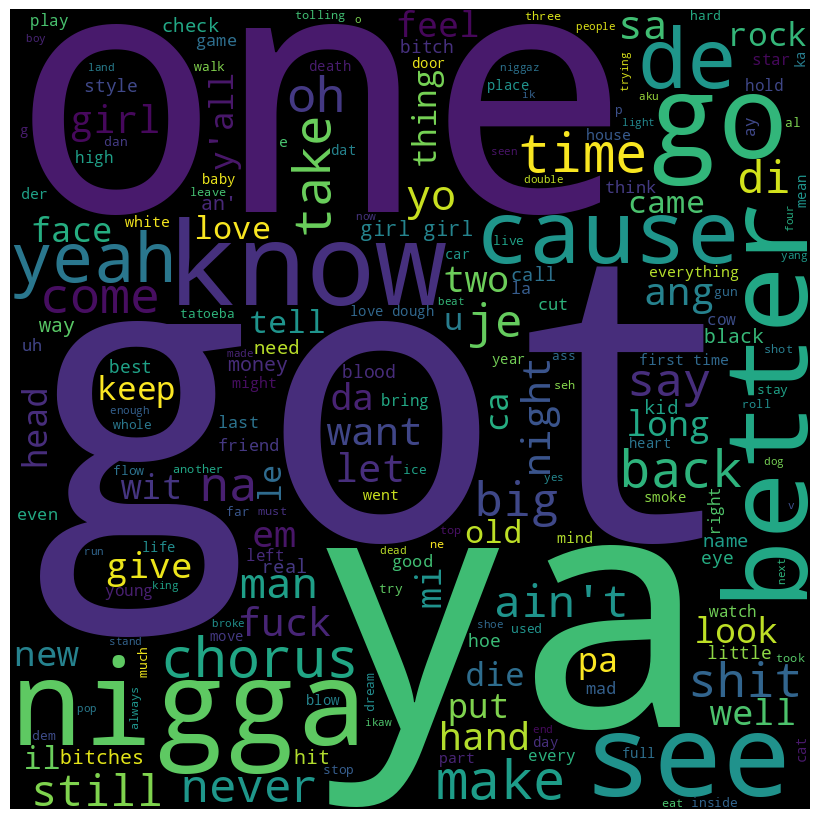

In [156]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

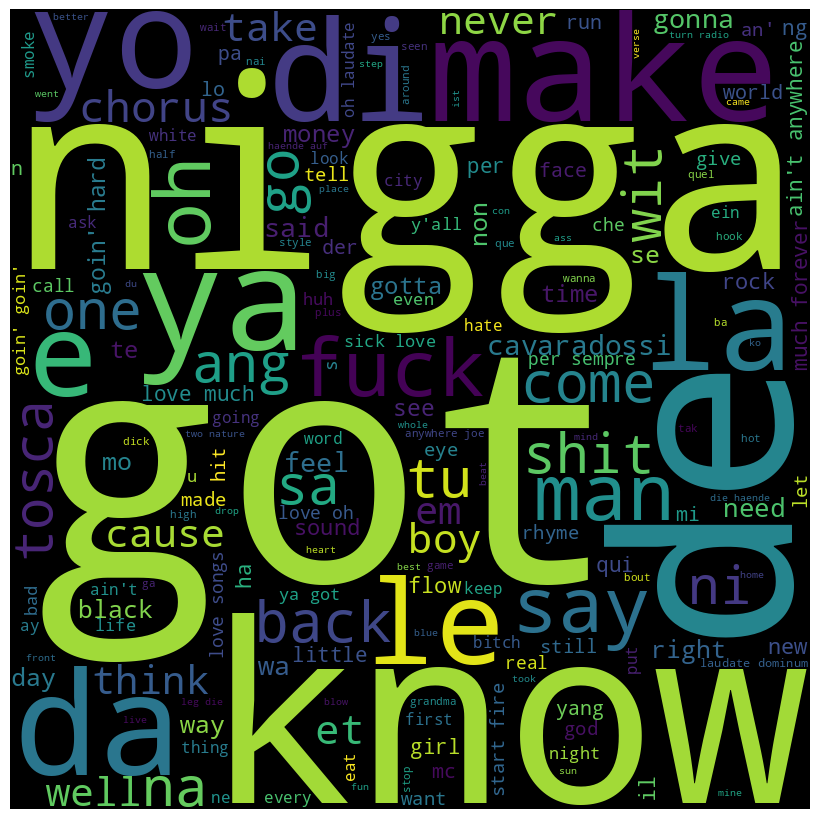

In [157]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud3)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### From the wordcloud for cluster 2(third cluster) we can get a hint from the prominent words in this cluster that the songs belonging to this group are likely going to be Rap songs; the words Nigga,Fuck,Ya,Bitch are words that are usually indicative of love songs and they appear prominently in this group

#### To confirm the type of music each cluster belongs to,i.e the representation of each cluster we will make an aggregation on all the genre's of all music in each cluster

In [159]:
import requests

In [163]:
url = "https://api.spotify.com/v1/recommendations/available-genre-seeds"
result = requests.get(url)

In [164]:
result

<Response [401]>